## Imports for the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates

In [2]:
# Displaying all the rows to better visualize the data
pd.options.display.max_rows = 999

In [3]:
# Reading the csv file and displaying the data
df = pd.read_csv('stud-stat-anonymous.csv')
df

,Unnamed: 0,Id,Total Absence,Class/Group,Subject,Absence,Subject.1,Absence.1,Subject.2,Absence.2,Subject.3,Absence.3
0,0,214366,100%,Web and Soft Electives,Big Data,100%,NaN,NaN,NaN,NaN,NaN,NaN
1,1,680092,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
2,2,906441,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
3,3,432875,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
4,4,146518,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
5,5,864755,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
6,6,464972,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
7,7,728877,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
8,8,419492,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN
9,9,205702,100%,Web and Soft Electives,Angular,100%,Web Security,100%,NaN,NaN,NaN,NaN


In [4]:
# Reorganizing the data into 4 sets /
# Making sure that we do not have NaN values
df1 = df[['Id', 'Class/Group', 'Subject','Absence']]
df2 = df[['Id', 'Class/Group', 'Subject.1', 'Absence.1']]

# Renaming columns so that we have the same keys (Column names)
df2.columns = ['Id', 'Class/Group', 'Subject', 'Absence']

# Dropping the values that have NaN from the subset
df2 = df2.dropna()

# Rinse and repeat
df3 = df[['Id', 'Class/Group', 'Subject.2','Absence.2']]
df3.columns = ['Id', 'Class/Group', 'Subject', 'Absence']
df3 = df3.dropna()

df4 = df[['Id', 'Class/Group', 'Subject.3','Absence.3']]
df4.columns = ['Id', 'Class/Group', 'Subject', 'Absence']
df4 = df4.dropna()

In [5]:
# Creating a DataFrame with all the data - Duplicate Students as some 
# Students have multiple electives
dfa = df1.append([df2, df3, df4], ignore_index=True)

In [6]:
# Writing the dataframe in a csv file for easy access
dfa.to_csv(r'reorganized_data.csv')

## Conducting Analysis on the sample (All of it) using Descriptive Statistics - Based on the Total Absence

In [7]:
# Taking the total absence of each student from the original dataframe
total_absence = list(df['Total Absence'])

In [8]:
# Method to convert the strings into float of form: 0.0
def p2f(x):
    return round(float(x.strip('%'))/100, 2)

In [9]:
# Modifing the total absence list
for i in range(len(total_absence)):
    total_absence[i] = p2f(total_absence[i])

In [10]:
# Creating bins to create a histogram 
# This will show us the frequency of attendance/absence of the sample

# Creating the bins - intervals
bins = [i/10 for i in range(0, 11)]
bins

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

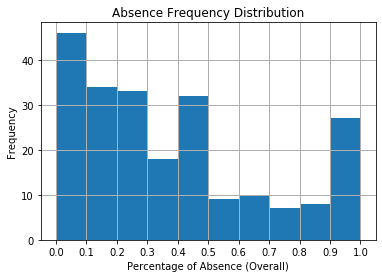

In [11]:
# Creating the histogram that shows the frequency
(n, bins, patches) = plt.hist(total_absence, bins, histtype='bar')
plt.xticks(bins)
plt.xlabel('Percentage of Absence (Overall)')
plt.ylabel('Frequency')

plt.title('Absence Frequency Distribution')
plt.grid(linestyle='-', linewidth=1)
plt.show()

In [12]:
# Number of students with respective total absence
def nos(numbers, val=0.0, interval=False, between=(0, 1)):
    if interval == False:
        counter = 0
        for i in numbers:
            if val == i:
                counter += 1
        return counter
    else:
        low, high = between
        counter = 0
        for i in numbers:
            if low <= i <=high:
                counter += 1
        return counter

In [13]:
pie_labels = ['Absence of 0%', 'Absence of 100%', 'Absence lower lower than 25%, not 0%', 'Absence greater than 75%, not 100%']

pie_values = [nos(total_absence, 0.0), 
              nos(total_absence, 1.0), 
              nos(total_absence, interval=True, between=(0.001, 0.25)),
              nos(total_absence, interval=True, between=(0.75, 0.999))]


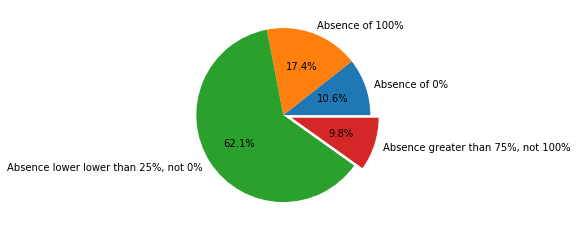

In [14]:
# Pie that represents the percentage of 
# students with certain percentage of absence

plt.pie(pie_values,
       labels=pie_labels,
       explode=(0, 0, 0, 0.1),
       autopct = '%1.1f%%'
       )
plt.show()

The mean is defined as: $\mu = \overline{x} = \frac{\sum{x}}{n}$

In [15]:
# The mean is the average of the data in question
df_absence = pd.DataFrame(total_absence)
df_absence.mean()

0    0.384196
dtype: float64

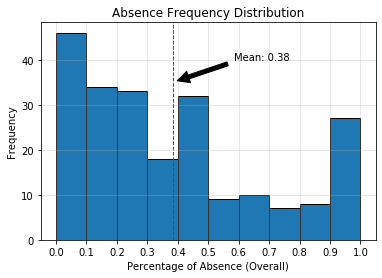

In [16]:
# Ploting a line to determine the mean over the Distribution of Frequency Histogram

plt.xticks(bins)
plt.hist(total_absence, bins, edgecolor='k', histtype='bar')
plt.axvline(np.asarray(total_absence).mean(), color='r', linestyle='dashed', linewidth=1)

plt.xlabel('Percentage of Absence (Overall)')
plt.ylabel('Frequency')


plt.annotate('Mean: {:.2f}'.format(float(df_absence.mean())), xy = (df_absence.mean(),35), xytext=(df_absence.mean()+0.2, 40),
            arrowprops = dict(facecolor = 'black', shrink = 0.07),
            )

plt.title('Absence Frequency Distribution')
plt.grid(linestyle='-', linewidth=1,alpha=0.3)


In [17]:
# The mode: Most frequent observation of the total sample
df_absence = pd.DataFrame(total_absence)
df_absence.mode()

# Even though the histogram shows that the most frequent values are between 0 and 0.1, 
# the most frequent value is 1 therefore moode of the total absences is 1.0

,0
0,1.0


In [18]:
# Median represents the center element of the set
df_absence.median()

0    0.29
dtype: float64

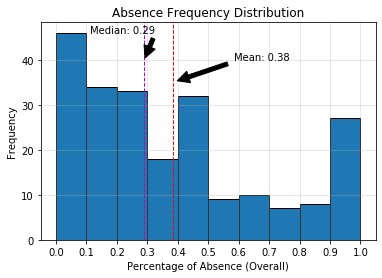

In [19]:
# Ploting a line to determine the mean over the Distribution of Frequency Histogram

plt.xticks(bins)
plt.hist(total_absence, bins, edgecolor='k', histtype='bar')

# Plotting the mean
plt.axvline(np.asarray(total_absence).mean(), color='r', linestyle='dashed', linewidth=1)
# Arrow and text
plt.annotate('Mean: {:.2f}'.format(float(df_absence.mean())), xy = (df_absence.mean(),35), xytext=(df_absence.mean()+0.2, 40),
            arrowprops = dict(facecolor = 'black', shrink = 0.07),
            )

#Ploting the median
plt.axvline(float(df_absence.median()), color='m', linestyle='dashed', linewidth=1)

plt.annotate('Median: {:.2f}'.format(float(df_absence.median())), xy = (df_absence.median(),40), xytext=(df_absence.median()- 0.18, 46),
            arrowprops = dict(facecolor = 'black', shrink = 0.07),
            )

plt.xlabel('Percentage of Absence (Overall)')
plt.ylabel('Frequency')

plt.title('Absence Frequency Distribution')
plt.grid(linestyle='-', linewidth=1,alpha=0.3)


In [20]:
# The median separates the higher half from the lower half of a data sample
# When the number of data points is odd, return the middle data point. 
# When the number of data points is even, the median is interpolated by taking 
# the average of the two middle values
df_absence.median()

0    0.29
dtype: float64

In [21]:
# The variance

The variance is defined as: 

$\sigma = \frac{\sum{(x_i - \mu)}^2}{n}$ for samples (degrees of freedom is 0),

$s^2 = \frac{\sum{(x_i - \mu)}^2}{n - 1}$ for populations (degrees of freedom is 1)

Mesure of dispersion of a data set. The average of the squared differences from the mean.

In [22]:
df_absence.var(ddof=0)

0    0.097727
dtype: float64

In [23]:
# The standard deviation
df_absence.std()

0    0.313313
dtype: float64

The standard deviation is defined as: 

$s = \sqrt{\frac{\sum{(x_i - \mu)}^2}{n}}$

$s = \sqrt{\frac{\sum{(x_i - \mu)}^2}{n - 1}}$

The standard deviation represents how spread the numbers are.

So, using the Standard Deviation we have a "standard" way of knowing what is normal, and what is extra large or extra small.

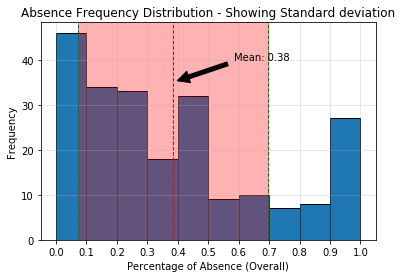

In [24]:
# Ploting a line to determine the mean over the Distribution of Frequency Histogram

plt.xticks(bins)
plt.hist(total_absence, bins, edgecolor='k', histtype='bar')

plt.axvline(np.asarray(total_absence).mean(), color='r', linestyle='dashed', linewidth=1)
plt.annotate('Mean: {:.2f}'.format(float(df_absence.mean())), xy = (df_absence.mean(),35), xytext=(df_absence.mean()+0.2, 40),
            arrowprops = dict(facecolor = 'black', shrink = 0.07),
            )

plt.xlabel('Percentage of Absence (Overall)')
plt.ylabel('Frequency')

# Plotting the standard deviation - 
# What percentage of students are in the standard deviation and what are extra absent/ extra present

stand_deviation = float(df_absence.std())
mean = float(df_absence.mean())
min_std = mean - stand_deviation
max_std = mean + stand_deviation

# Plotting the standard deviation lines
plt.axvline(min_std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(max_std, color='g', linestyle='dashed', linewidth=1)

plt.axvspan(min_std, max_std, color='red', alpha=0.3)

plt.title('Absence Frequency Distribution - Showing Standard deviation')
plt.grid(linestyle='-', linewidth=1,alpha=0.3)


Standard error of the mean is defined as:

$\sigma_\mu = \frac{\mu}{\sqrt{n}}$

The standard error (SE) of a statistic is the approximate standard deviation of a statistical sample population. The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population—this deviation is the standard error of the mean.

In [25]:
df_absence.sem()

0    0.020934
dtype: float64

### Further dividing and analysing the data
Question: Is the most popular subject the most attended? (Has the highest attendance rate)

Step 1: Identify the classification of subjects

Step 2: See the attendance rate per subjects
        - Harder than it seems. But can be calculated by grouping the dataset by subject and then getting the mean (average of the dataset in question)

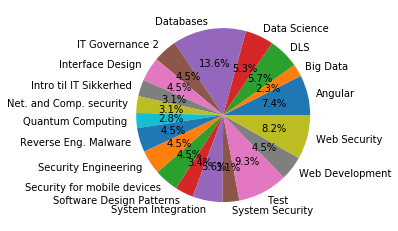

In [26]:
sub_list = dfa['Subject'].tolist()
sub_list.sort()
sub_labels = ['Angular', 'Big Data', 'DLS', 'Data Science', 'Databases', 
              'IT Governance 2', 'Interface Design', 'Intro til IT Sikkerhed',
              'Net. and Comp. security', 'Quantum Computing', 'Reverse Eng. Malware', 
              'Security Engineering', 'Security for mobile devices', 'Software Design Patterns',
              'System Integration', 'System Security', 'Test', 'Web Development', 'Web Security',
             ]

from itertools import groupby

stud_p_sub = [len(list(group)) for key, group in groupby(sub_list)]

plt.pie(stud_p_sub,
       labels=sub_labels,
       autopct = '%1.1f%%'
       )
plt.show()


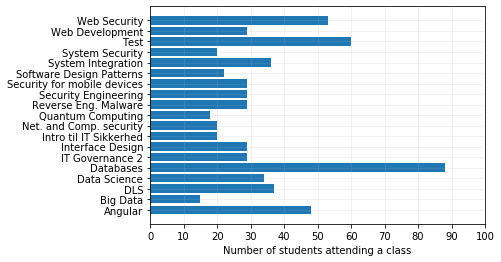

In [27]:
# The pie is kinda hard to read... Let's have a horizontal bar chart

plt.barh(sub_labels, stud_p_sub)
plt.grid(alpha=0.2)
plt.xticks([i*10 for i in range(0, 11)])
plt.xlabel("Number of students attending a class")
plt.show()

In [28]:
# Grouping the dataset into smaller datasets by subject

sub_absence = {}
d = dict(tuple(dfa.groupby('Subject')))
# Extracting the absence procentage of each student for that subject
for key in d:
    sub_absence.update({key:list(d[key]['Absence'])})

# Converting the values into floats
for key, values in sub_absence.items():
    for i in range(len(values)):
        values[i] = p2f(values[i])

# Calculating the mean for each subject
sub_means = {}
for key, values in sub_absence.items():
    sub_means.update({key: float(pd.DataFrame(values).mean())})

sub_means

{'Angular': 0.5741666666666666,
 'Big Data': 0.4853333333333334,
 'DLS': 0.5627027027027026,
 'Data Science': 0.20411764705882354,
 'Databases': 0.19318181818181818,
 'IT Governance 2': 0.0,
 'Interface Design': 0.39482758620689656,
 'Intro til IT Sikkerhed': 0.4875,
 'Net. and Com. security': 0.5450000000000002,
 'Quantum Computing': 0.16666666666666666,
 'Reverse Eng. Malware': 0.3193103448275862,
 'Security Engineering': 0.4193103448275862,
 'Security for mobile devices': 0.4624137931034484,
 'Software Design Patterns': 0.3113636363636364,
 'System Integration': 0.3888888888888889,
 'System Security': 0.4240000000000001,
 'Test': 0.28333333333333316,
 'Web Development': 0.13,
 'Web Security': 0.35018867924528313}

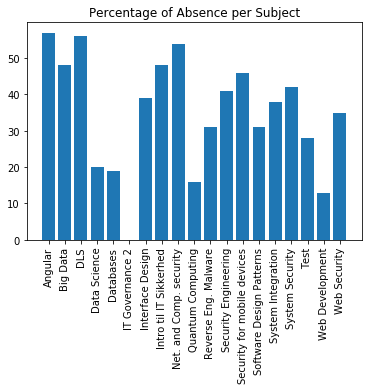

In [29]:
# Showcasing the absence percentage per subject (Low means less absent, high means more absent)
mean_list = list(sub_means.values())
plt.bar(sub_labels, [int(i*100) for i in mean_list])
plt.xticks(sub_labels, rotation='vertical')
plt.title("Percentage of Absence per Subject")
plt.show()

## Note!
The above chart and descriptive statistics does not truely depict the absence rate per class, as each subject has a different amount of students

However, in this instance it can be observed that the most popular subject (Databases) does not have the lowest absence rate, though it is in top 5

### Visualize how many students each Class/Group has and it's percentage of the sample

In [30]:
# Grouping the data into smaller sets

class_grouped = dict(tuple(df.groupby('Class/Group')))
class_labels = list(class_grouped.keys())
class_labels

['ITS18a', 'ITS19w1', 'SD18i', 'SD19w1', 'Web and Soft Electives', 'Web19w1']

In [31]:
# Getting the number of students per group/class
group_list = df['Class/Group'].tolist()
group_list.sort()
stud_p_class = [len(list(group)) for key, group in groupby(group_list)]



In [32]:
stud_p_class

[29, 20, 37, 32, 77, 29]

In [33]:
# Altering the labels
for i in range(len(class_labels)):
    class_labels[i] += " - " + str(stud_p_class[i]) + " students" 

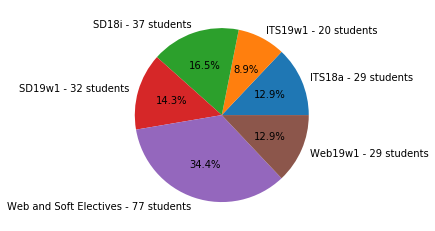

In [34]:
# Creating the pie

plt.pie(stud_p_class,
       labels=class_labels,
       autopct = '%1.1f%%'
       )
plt.show()


## See if the number of subjects influences the attendance of a student

We presume that more subjects = more absence

Step 1: Divide the dataset into smaller datasets per Class/Group 

Step 2: Get the number of subjects per Class/Group

Step 3: Calculate the absence rate per Class/Group
 
Step 4: Corelate that with the number of subjects

In [35]:
# Step 1: Grouping the data into smaller sets per Class/Group
class_grouped = dict(tuple(dfa.groupby('Class/Group')))


In [36]:
# Method to calculate median for a list
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

In [37]:
# Dictionary with Class/Groups and number of subjects. 
# We are not considering special cases:
# Students that have less or more subjects than most of the members of a group

# Step 2: Grouping by two columns, to get the number of subject per student
series = dfa.groupby(['Class/Group', 'Id']).size()

# Converting it to a DataFrame
dfx = pd.DataFrame(series)
dfx = dfx.rename(columns={0: 'Subjects'})

# Creating a dictionary with keys representing the class/group 
# and the values which is a list of number of subjects per student - 
# We are counting the number of entries in the reorganized DataFrame
current_cls = ''
dict_cls = {}
for key, row in dfx.iterrows():
    if current_cls != key[0]:
        dict_cls[key[0]] = []
        current_cls = key[0]
    dict_cls[current_cls].append(row["Subjects"])
# ans = Average number of subjects per class - Dictionary 
# Key - Class, Value - Median of number os subjects
ans = {}
for entry in dict_cls:
    ans[entry] = median(dict_cls[entry])
ans

{'ITS18a': 4,
 'ITS19w1': 3.0,
 'SD18i': 3,
 'SD19w1': 3.0,
 'Web and Soft Electives': 2,
 'Web19w1': 3}

In [38]:
# Step 3: Calculate the absence rate per Class/Group

class_absence = {}
d = dict(tuple(df.groupby('Class/Group')))
# Extracting the absence procentage of each student for that subject
for key in d:
    class_absence.update({key:list(d[key]['Total Absence'])})

# Converting the values into floats
for key, values in class_absence.items():
    for i in range(len(values)):
        values[i] = p2f(values[i])

# Calculating the mean for each subject
class_means = {}
for key, values in class_absence.items():
    class_means.update({key: float(pd.DataFrame(values).mean())})

class_means

{'ITS18a': 0.3906896551724136,
 'ITS19w1': 0.48299999999999993,
 'SD18i': 0.5032432432432433,
 'SD19w1': 0.22093749999999998,
 'Web and Soft Electives': 0.401038961038961,
 'Web19w1': 0.29310344827586216}

In [39]:
class_labels = [(i + " - " + str(int(ans[i]))) for i in ans]
class_labels

['ITS18a - 4',
 'ITS19w1 - 3',
 'SD18i - 3',
 'SD19w1 - 3',
 'Web and Soft Electives - 2',
 'Web19w1 - 3']

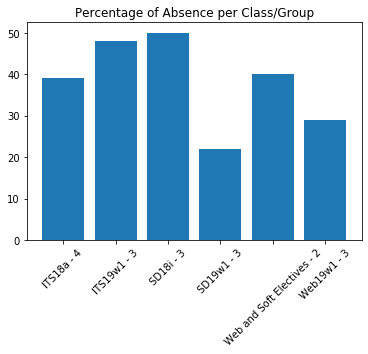

In [40]:
# Step 4: Corelate the absence rate that with the number of subjects

plt.bar(class_labels, [int(i*100) for i in class_means.values()])
plt.xticks(class_labels, rotation='45')
plt.title("Percentage of Absence per Class/Group")
plt.show()

In [41]:
# So no, the amount of subjects does not matter as the group that is having 4 
# subjects is less absent than the ones that have 3


### Flexing muscles - Let's make a 3D bar chart

x axis will represent the number of subject

z axis will represent the absence rate

y axis will represent the group name

In [42]:
class_labels
list(ans.keys())

['ITS18a', 'ITS19w1', 'SD18i', 'SD19w1', 'Web and Soft Electives', 'Web19w1']

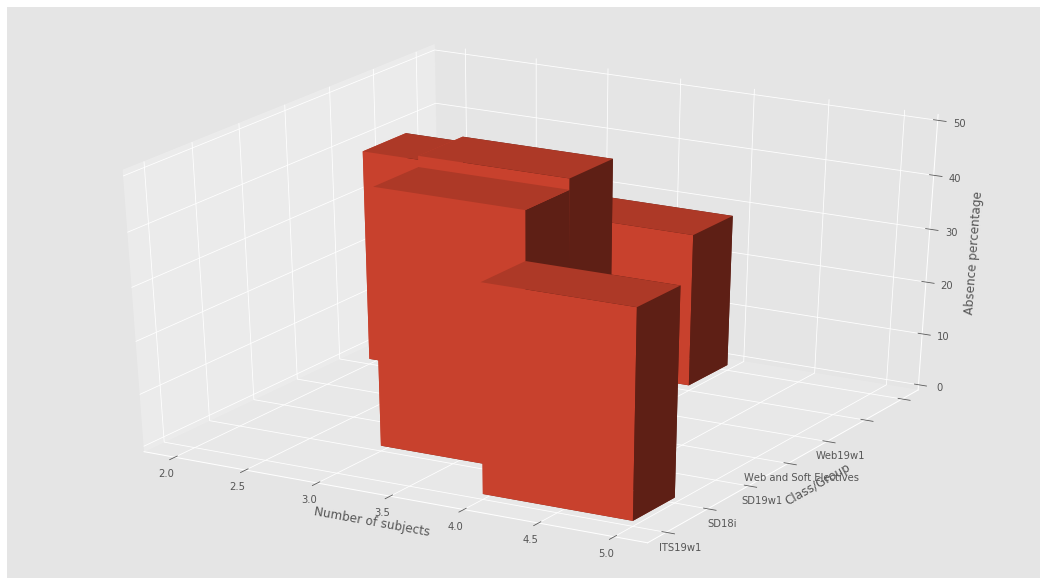

In [43]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [int(ans[i]) for i in ans]
y3 = [i for i in range(1,7)]
z3 = np.zeros(6)

dx = np.ones(6)
dy = np.ones(6)
dz = [int(i*100) for i in class_means.values()]

ax1.bar3d(x3, y3, z3, dx, dy, dz)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig('test2png.png', dpi=100)

ax1.set_xlabel('Number of subjects')
ax1.set_ylabel('Class/Group')
ax1.set_zlabel('Absence percentage')

ax1.set_yticklabels(list(ans.keys()))
plt.show()